# Lien vers la dataset
https://www.kaggle.com/datasets/ziya07/tourism-resource-management-dataset

# les imports

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# La lecture du csv file

In [8]:
df = pd.read_csv('tourism_resource_dataset.csv')

# Consultation et nettoyage

In [9]:
df.describe()

,visitor_count,resource_usage_rate,temperature,air_quality_index,noise_level,peak_hour_flag,visitor_satisfaction,sensor_noise_flag,resource_prediction,t_sne_dim1,t_sne_dim2
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,516.800000,0.647452,25.181186,86.485000,64.028052,0.511000,5.555733,0.467000,0.582126,-0.477890,-0.422334
std,281.178718,0.199183,5.758527,37.615166,19.916098,0.500129,2.554291,0.499159,0.174560,17.179542,15.797633
min,50.000000,0.300132,15.008856,20.000000,30.013057,0.000000,1.014411,0.000000,0.184301,-34.308690,-38.914820
25%,274.000000,0.469661,20.231001,53.000000,46.979884,0.000000,3.468966,0.000000,0.462370,-13.762012,-12.932375
50%,510.000000,0.652413,25.449839,87.000000,63.456537,1.000000,5.599099,0.000000,0.576830,-0.444045,0.167176
75%,762.250000,0.818292,30.240147,120.000000,81.232047,1.000000,7.725748,1.000000,0.701947,12.986121,12.436126
max,999.000000,0.997955,34.994276,149.000000,99.826269,1.000000,9.997764,1.000000,0.976715,36.515007,33.652870


In [10]:
df.head()

,timestamp,location_id,visitor_count,resource_usage_rate,temperature,air_quality_index,noise_level,season,peak_hour_flag,visitor_satisfaction,sensor_noise_flag,resource_prediction,resource_allocation,t_sne_dim1,t_sne_dim2
0,2024-12-01 00:00:00,LOC_003,808,0.907638,19.368864,127,51.506727,summer,0,5.502615,1,0.857819,high,-4.576337,0.582736
1,2024-12-01 01:00:00,LOC_001,948,0.974266,17.404945,37,55.901717,autumn,0,4.736401,0,0.961133,high,-28.314085,20.022820
2,2024-12-01 02:00:00,LOC_003,292,0.321912,16.366819,113,68.533024,winter,1,2.522827,0,0.306956,low,1.329948,5.881103
3,2024-12-01 03:00:00,LOC_003,592,0.811889,20.266316,52,85.301039,autumn,1,2.687745,1,0.701945,medium,-11.921675,20.376535
4,2024-12-01 04:00:00,LOC_001,89,0.936667,15.922471,145,52.258779,summer,1,1.094965,1,0.512834,medium,-6.068825,-4.793058


In [11]:
# Convertir 'timestamp' en datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Visualisation

# 1. Diagramme de dispersion de la <br>fréquentation vs. taux d'utilisation <br>des ressources, coloré par saison

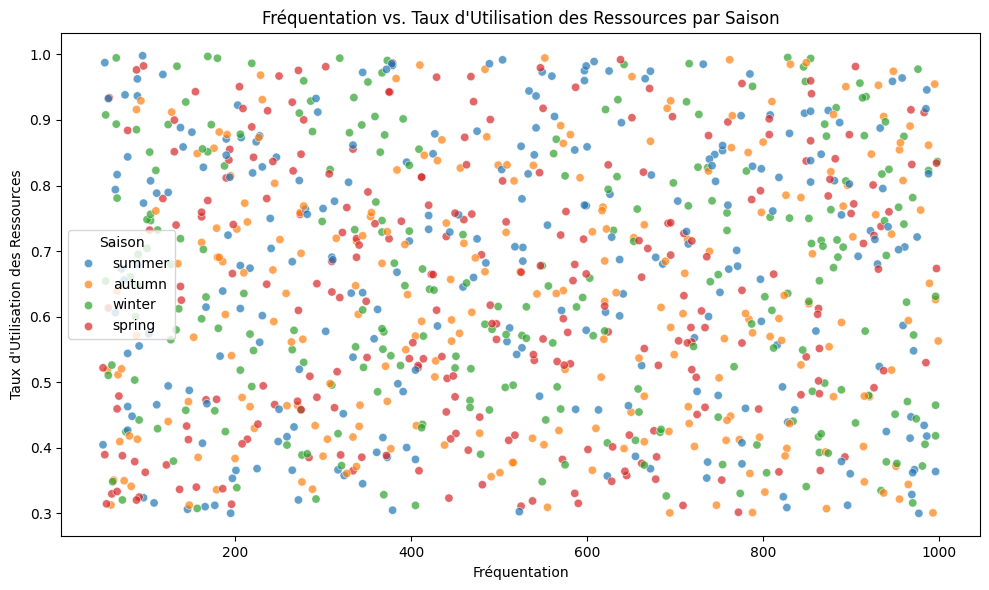

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='visitor_count', y='resource_usage_rate', hue='season', data=df, alpha=0.7)
plt.title("Fréquentation vs. Taux d'Utilisation des Ressources par Saison")
plt.xlabel('Fréquentation')
plt.ylabel("Taux d'Utilisation des Ressources")
plt.legend(title='Saison')
plt.tight_layout()
plt.show()

# 2. Diagrammes en boîte de la <br>satisfaction des visiteurs selon les saisons

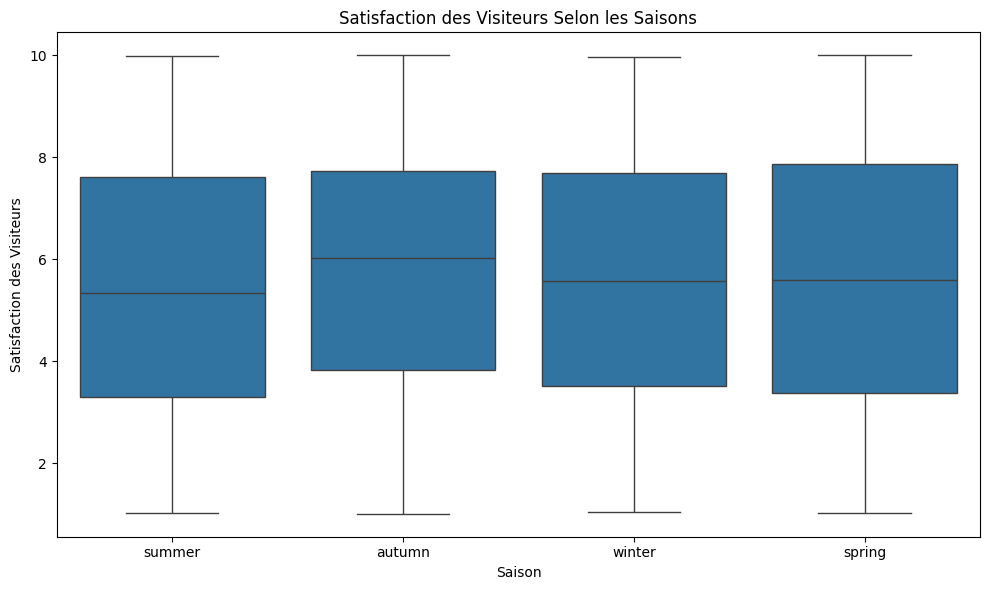

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='visitor_satisfaction', data=df)
plt.title('Satisfaction des Visiteurs Selon les Saisons')
plt.xlabel('Saison')
plt.ylabel('Satisfaction des Visiteurs')
plt.tight_layout()
plt.show()

# 3. Diagrammes en barres de <br>la distribution de l'allocation des ressources <br>selon les emplacements

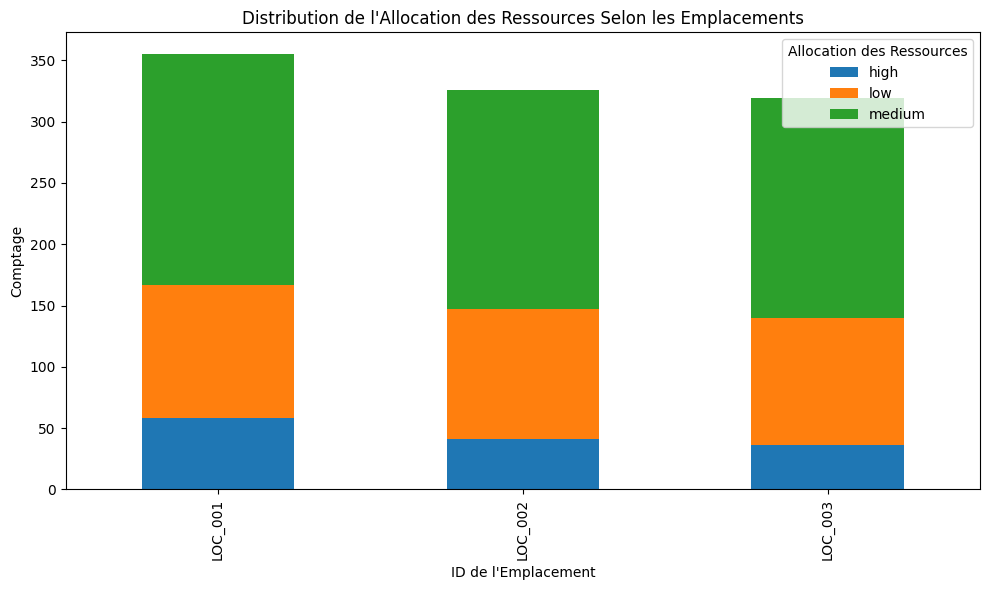

In [14]:
allocation_counts = df.groupby(['location_id', 'resource_allocation']).size().unstack().fillna(0)
allocation_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution de l'Allocation des Ressources Selon les Emplacements")
plt.xlabel("ID de l'Emplacement")
plt.ylabel('Comptage')
plt.legend(title='Allocation des Ressources')
plt.tight_layout()
plt.show()

# 4. Carte de la corrélation <br>entre les variables numériques

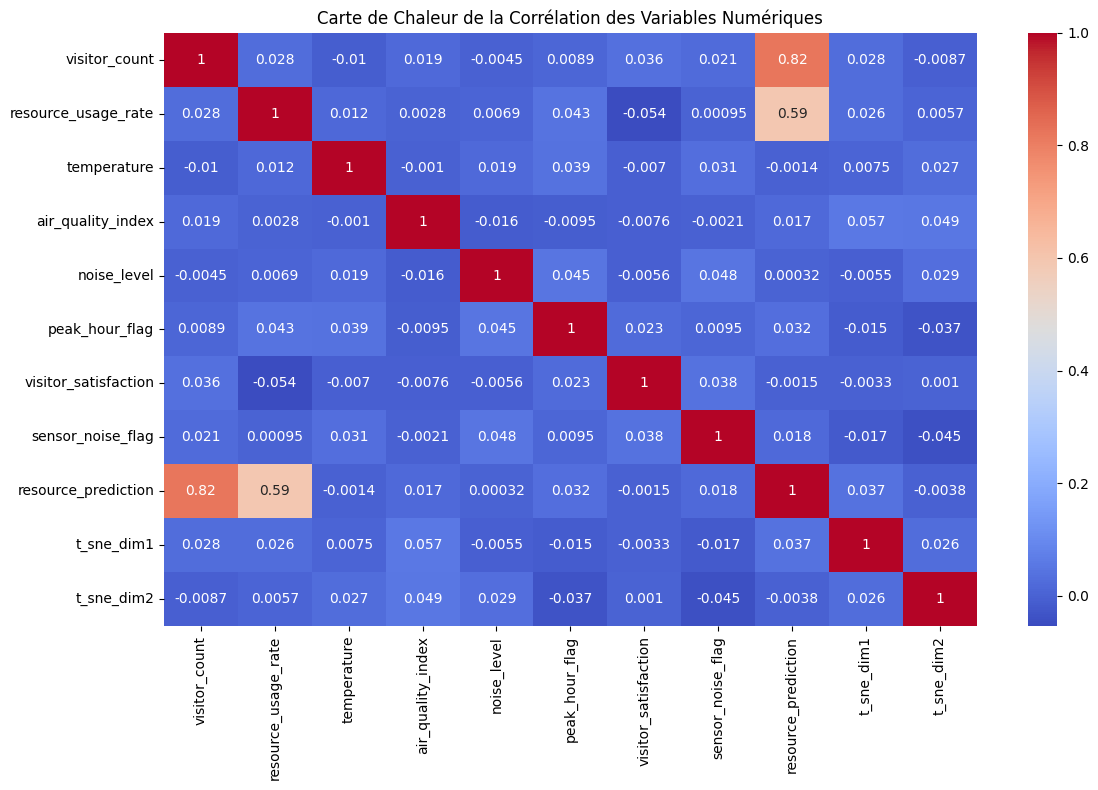

In [ ]:
numerical_df = df.select_dtypes(include=[np.number])
matrice_correlation = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(matrice_correlation, annot=True, cmap='coolwarm')
plt.title('Carte de Chaleur de la Corrélation des Variables Numériques')
plt.tight_layout()
plt.show()

# 5. Diagramme de dispersion des <br>dimensions t-SNE colorées par l'allocation <br>des ressources

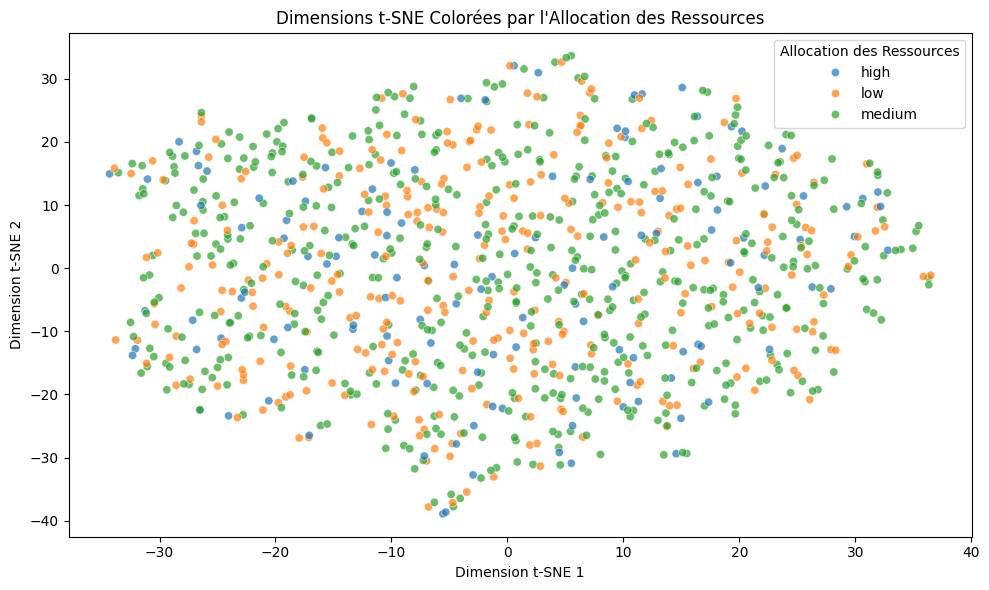

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='t_sne_dim1', y='t_sne_dim2', hue='resource_allocation', data=df, alpha=0.7)
plt.title("Dimensions t-SNE Colorées par l'Allocation des Ressources")
plt.xlabel('Dimension t-SNE 1')
plt.ylabel('Dimension t-SNE 2')
plt.legend(title='Allocation des Ressources')
plt.tight_layout()
plt.show()

# 6. Diagramme en ligne de la température <br>moyenne, de l'indice de qualité de l'air et du <br>niveau de bruit au fil du temps

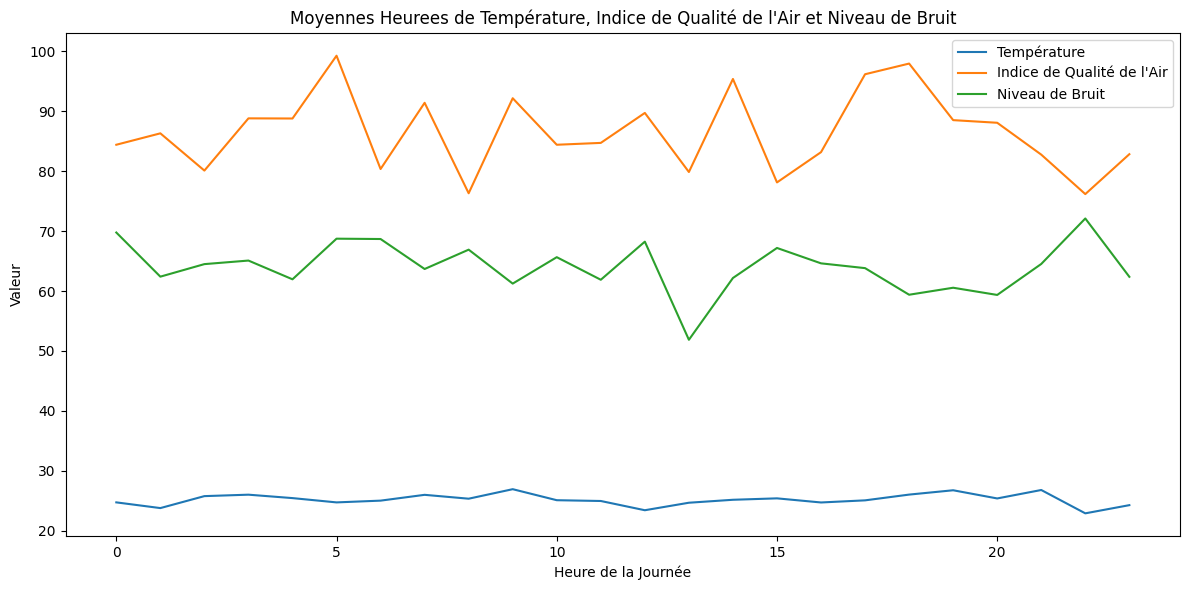

In [17]:
df['heure'] = df['timestamp'].dt.hour
moyenne_heuree = df.groupby('heure')[['temperature', 'air_quality_index', 'noise_level']].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='heure', y='temperature', data=moyenne_heuree, label='Température')
sns.lineplot(x='heure', y='air_quality_index', data=moyenne_heuree, label="Indice de Qualité de l'Air")
sns.lineplot(x='heure', y='noise_level', data=moyenne_heuree, label='Niveau de Bruit')
plt.title("Moyennes Heurees de Température, Indice de Qualité de l'Air et Niveau de Bruit")
plt.xlabel('Heure de la Journée')
plt.ylabel('Valeur')
plt.legend()
plt.tight_layout()
plt.show()

# 7. Diagramme de dispersion <br>de la température vs. la satisfaction <br>des visiteurs

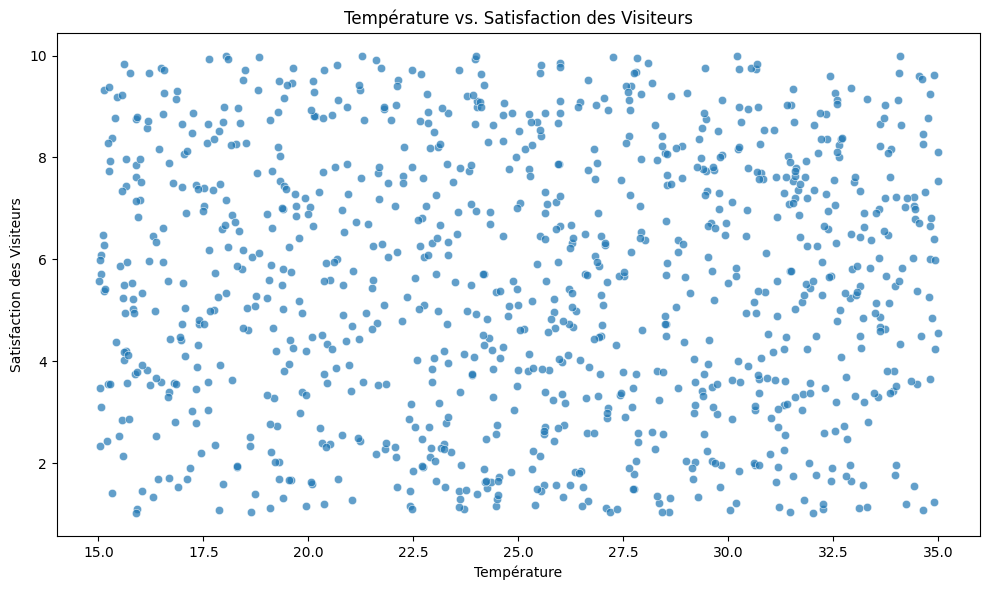

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='visitor_satisfaction', data=df, alpha=0.7)
plt.title('Température vs. Satisfaction des Visiteurs')
plt.xlabel('Température')
plt.ylabel('Satisfaction des Visiteurs')
plt.tight_layout()
plt.show()

# Test des modèles et sauvegarde du meilleur avec LE et scaler

In [19]:
# Extraire l'heure et le jour de la semaine à partir de timestamp
df['heure'] = df['timestamp'].dt.hour
df['jour_semaine'] = df['timestamp'].dt.dayofweek

# Encoder les variables catégorielles
colonnes_categorielles = ['location_id', 'season', 'peak_hour_flag', 'sensor_noise_flag', 'resource_allocation']
label_encoders = {}

for col in colonnes_categorielles:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Stocker l'encodeur pour une utilisation ultérieure

# Définir les fonctionnalités et la variable cible
fonctionnalites = ['heure', 'jour_semaine', 'visitor_count', 'temperature', 'air_quality_index',
            'noise_level', 'visitor_satisfaction', 't_sne_dim1', 't_sne_dim2',
            'location_id', 'season', 'peak_hour_flag', 'sensor_noise_flag',
            'resource_allocation']

cible = 'resource_usage_rate'

X = df[fonctionnalites]
y = df[cible]

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les fonctionnalités
scaler = StandardScaler()
X_train_normalise = scaler.fit_transform(X_train)
X_test_normalise = scaler.transform(X_test)

# Entraîner plusieurs modèles

# Régression Linéaire
modele_lr = LinearRegression()
modele_lr.fit(X_train_normalise, y_train)
prédiction_lr = modele_lr.predict(X_test_normalise)
print('Métriques de Régression Linéaire:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, prédiction_lr)))
print('MAE:', mean_absolute_error(y_test, prédiction_lr))
print('Coefficient R2:', r2_score(y_test, prédiction_lr))
print('-----------------------------')

# Régression Arbre de Décision
modele_dt = DecisionTreeRegressor(random_state=42)
modele_dt.fit(X_train_normalise, y_train)
prédiction_dt = modele_dt.predict(X_test_normalise)
print("Métriques de l'Arbre de Décision:")
print('RMSE:', np.sqrt(mean_squared_error(y_test, prédiction_dt)))
print('MAE:', mean_absolute_error(y_test, prédiction_dt))
print('Coefficient R2:', r2_score(y_test, prédiction_dt))
print('-----------------------------')

# Régression Forêt Aléatoire
modele_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modele_rf.fit(X_train_normalise, y_train)
prédiction_rf = modele_rf.predict(X_test_normalise)
print('Métriques de la Forêt Aléatoire:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, prédiction_rf)))
print('MAE:', mean_absolute_error(y_test, prédiction_rf))
print('Coefficient R2:', r2_score(y_test, prédiction_rf))
print('-----------------------------')

# Régression Boosting Gradient
modele_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
modele_gb.fit(X_train_normalise, y_train)
prédiction_gb = modele_gb.predict(X_test_normalise)
print('Métriques du Boosting Gradient:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, prédiction_gb)))
print('MAE:', mean_absolute_error(y_test, prédiction_gb))
print('Coefficient R2:', r2_score(y_test, prédiction_gb))
print('-----------------------------')

# Sauvegarder les modèles et les scalers


joblib.dump(modele_rf, 'rf_model.pkl')

joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

print('Modèles et objets de préprocessing sauvegardés.')

Métriques de Régression Linéaire:
RMSE: 0.20596124808940416
MAE: 0.17604051098492499
Coefficient R2: -0.03832472209135629
-----------------------------
Métriques de l'Arbre de Décision:
RMSE: 0.16719126855302702
MAE: 0.12954267513764708
Coefficient R2: 0.31579010500913984
-----------------------------
Métriques de la Forêt Aléatoire:
RMSE: 0.1339648300493112
MAE: 0.1083718197955057
Coefficient R2: 0.5607176443378721
-----------------------------
Métriques du Boosting Gradient:
RMSE: 0.13805053884705387
MAE: 0.113587645442596
Coefficient R2: 0.5335142550231589
-----------------------------
Modèles et objets de préprocessing sauvegardés.
